In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [3]:
import os
from PIL import Image

fileNames = []
for folder in os.listdir("../cropped_data/3_zones"):
    for imageName in os.listdir(f"../cropped_data/3_zones/{folder}"):
        fileName = f"{imageName[23:-4]}_raw.npy"
        fileNames.append(fileName)
        np.save(fileName, np.asarray(Image.open(f"../cropped_data/3_zones/{folder}/{imageName}")))

files_with_no_extension = []
for name in fileNames:
    files_with_no_extension.append(name[:-4])
files_with_no_extension    


['Ditches_zone1_raw',
 'HPMF_zone1_raw',
 'Impoundment_zone1_raw',
 'Skyview_zone1_raw',
 'Slope_zone1_raw',
 'Ditches_zone2_raw',
 'HPMF_zone2_raw',
 'Impoundment_zone2_raw',
 'Skyview_zone2_raw',
 'Slope_zone2_raw',
 'Ditches_zone3_raw',
 'HPMF_zone3_raw',
 'Impoundment_zone3_raw',
 'Skyview_zone3_raw',
 'Slope_zone3_raw']

In [331]:
import numpy as np
import math

def grid_creator(arr, grid_size):
    width, height = grid_size
    holder_size = (len(arr)*len(arr[0])//width)
    holder = np.zeros([holder_size, width*height])
    index = 0
    for i in range(0, len(arr), width):
        ix = i+width
        for j in range(0, len(arr[0]), height):
            jy = j+height
            if arr[i:ix,j:jy].shape != grid_size: #Skip incomplete zones
                continue
            holder[index] = arr[i:ix,j:jy].reshape(width*height)
            index +=1
    return holder[:index]

def feature_grid_creator(arr, grid_size):
    size = grid_size[0]*grid_size[1]
    dim = arr.shape[0]*arr.shape[1]
    holder = np.empty([arr.shape[-1], (dim)//(size), size])
    for i in range(arr.shape[-1]):
        a = grid_creator(arr[...,i], grid_size)
        holder[i] = a
    return holder

def features_to_grid_creator(input_arr,grid_size):
    arr = feature_grid_creator(input_arr,grid_size)
    size = arr.shape[0]*arr.shape[2]
    holder = np.zeros([arr.shape[1], size])
    tmp = np.empty([size])                       
    for i in range(0, arr.shape[1]):    
        for j in range(0, arr.shape[0]):
            tmp[(j*arr.shape[2]) : (j*arr.shape[2]+arr.shape[2]) ] = arr[j][i][:]
        holder[i] = tmp
    return holder

_y = np.load("Ditches_zone3_raw.npy")
print(_y.shape)
import scipy.ndimage.morphology as morph
_y = morph.binary_dilation(_y,iterations = 3)
_y.shape

highRes = grid_creator(_y, (15,15))
y = np.zeros(highRes.shape[0])
for i, item in enumerate(highRes):
    if 1 in item:
        y[i] = 1

(3000, 2625)


In [351]:
###### _y = np.load("../feature_extracted/ditches500.npy")
# y = _y.reshape(-1)
hpmf = np.load("HPMF_zone3_raw.npy")
impoundment = np.load("Impoundment_zone3_raw.npy")
skyview = np.load("Skyview_zone3_raw.npy")
slope = np.load("Slope_zone3_raw.npy")
_X = np.dstack([impoundment,skyview,hpmf,slope])

X = features_to_grid_creator(_X,(45,45))

ValueError: could not broadcast input array from shape (3828,2025) into shape (3888,2025)

In [ ]:

plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
# This line is used to test with a buffer of the ditches Comment out if not buffer should be used


plt.imshow(y)
y=y.reshape(-1)

In [342]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [343]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight="balanced")

clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [344]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

y_pred = clf.predict(X_test)
print(len(X_test))
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

10500
0.922952380952381
0.3712
[[9227   23]
 [ 786  464]]


[0.00023205 0.00015797 0.00011241 ... 0.00076824 0.00027264 0.000229  ]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

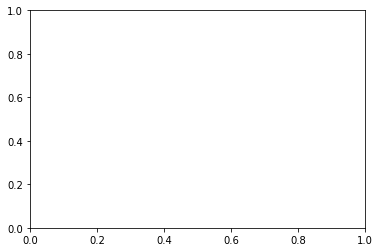

In [276]:
print(clf.feature_importances_)
plt.bar([None]*100, clf.feature_importances_)

In [170]:
arr = np.zeros(_X.shape)
prediction_on_map = clf.predict(X)

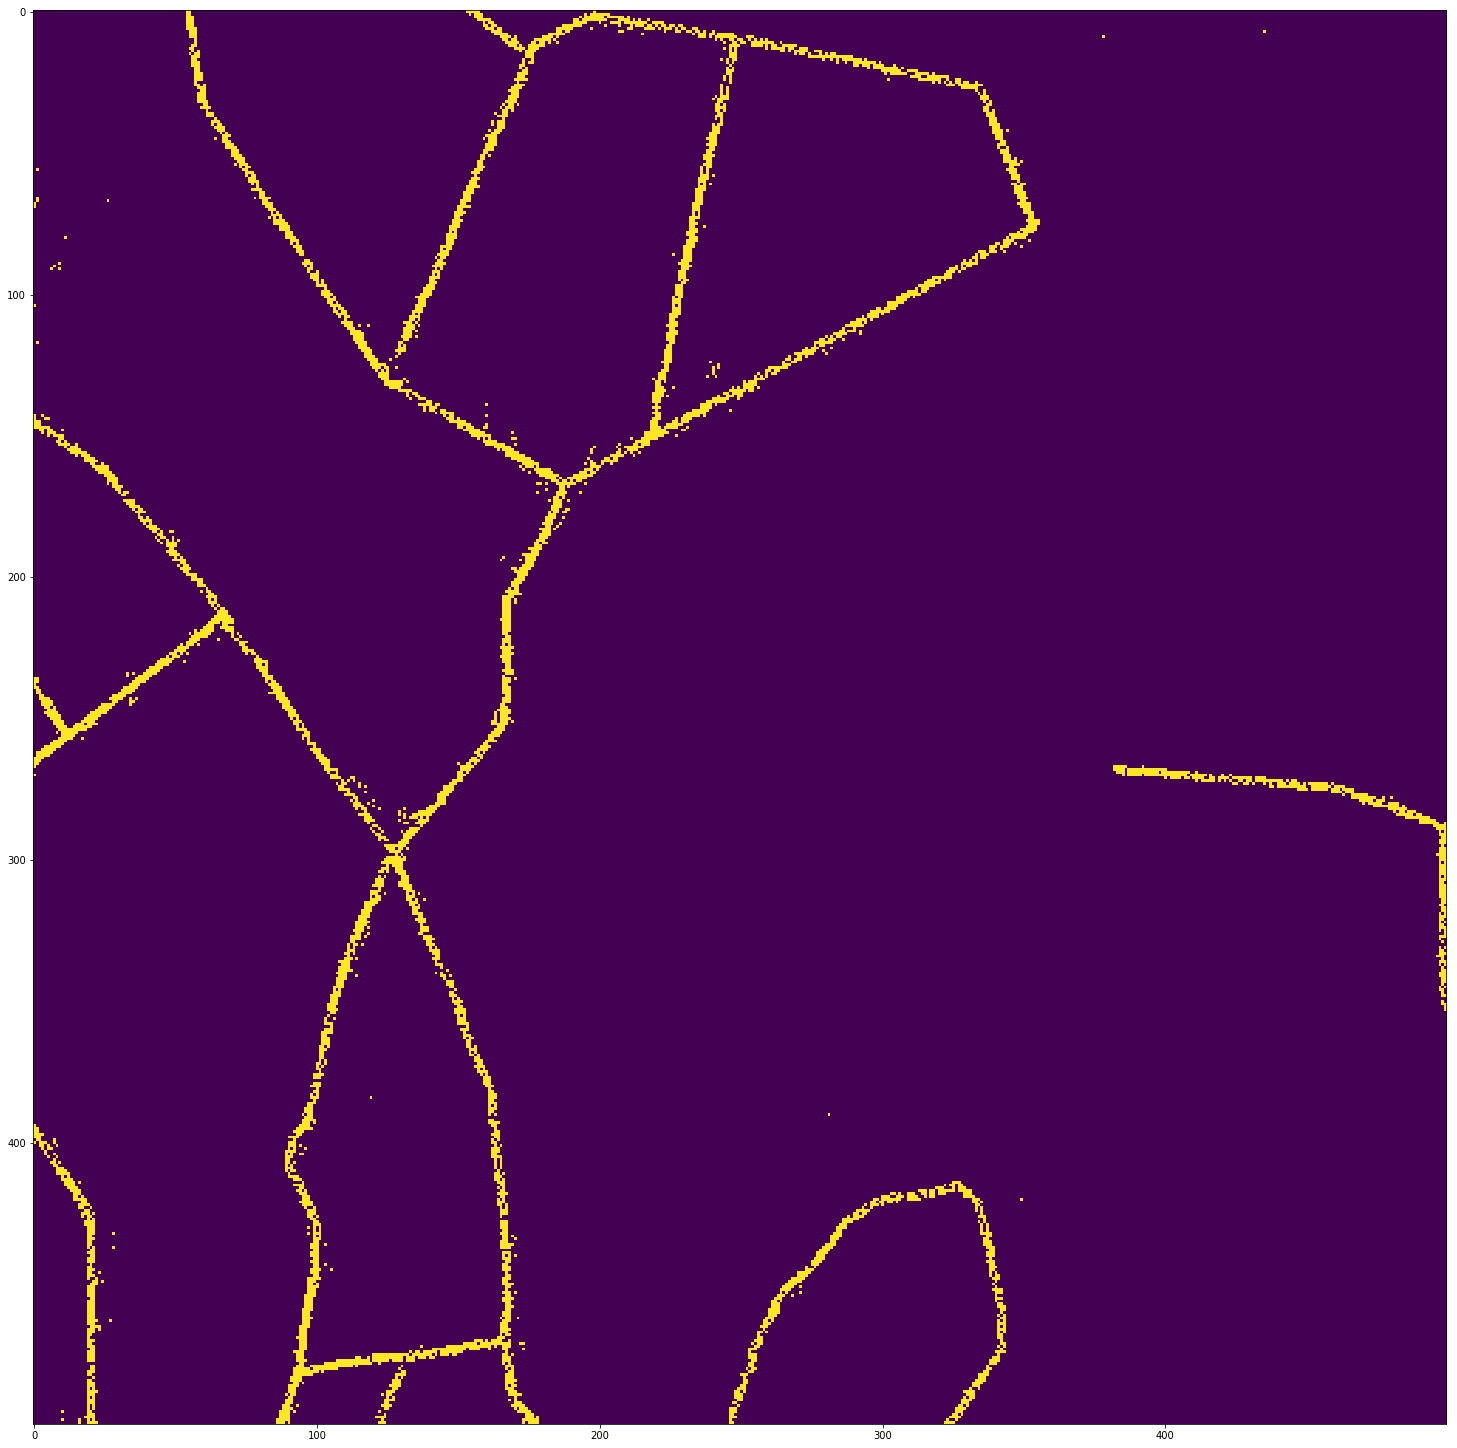

In [171]:
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.imshow(prediction_on_map.reshape(500,500))

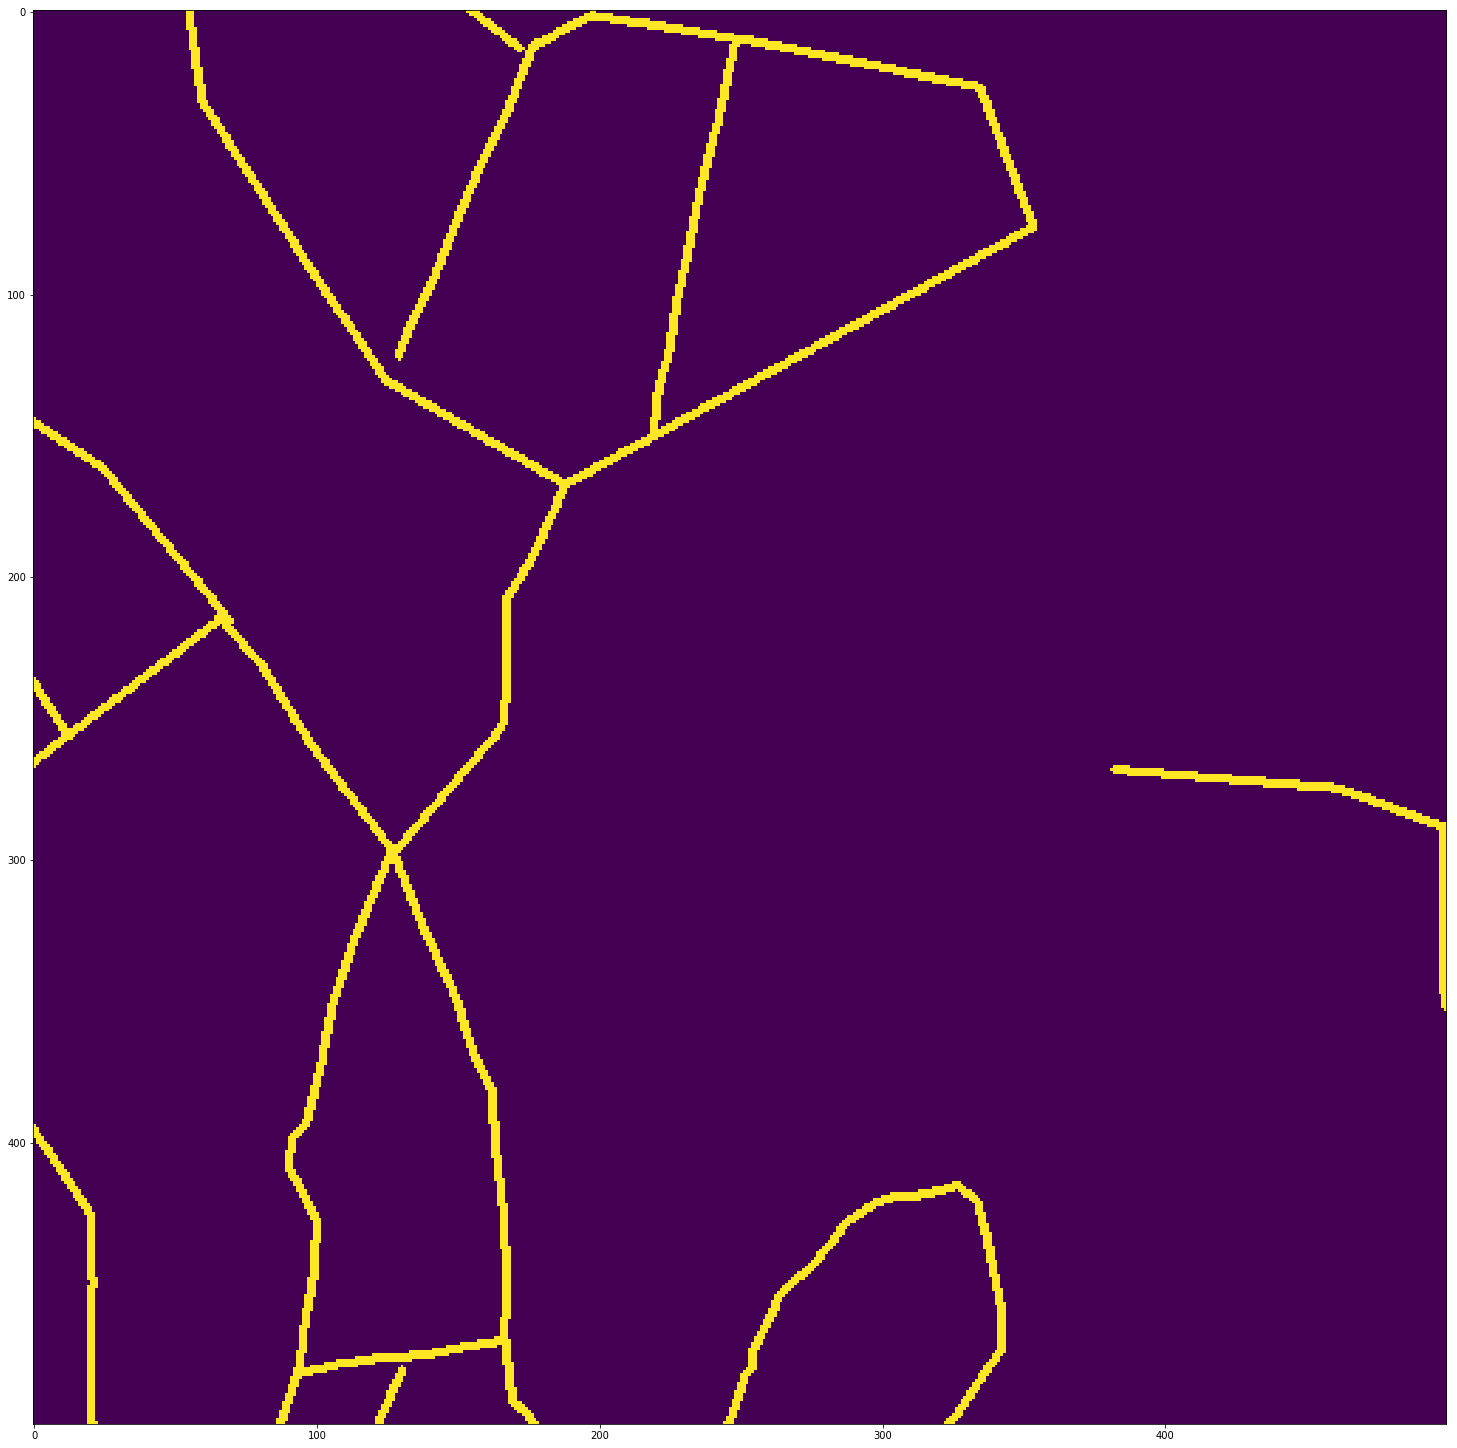

In [124]:
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')

plt.imshow(buffer_arr)

TypeError: Invalid dimensions for image data

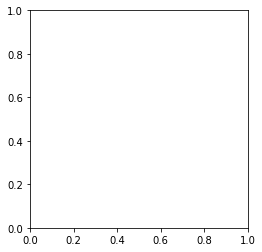

In [125]:
prediction_on_map_3buffer = clf.predict(X)
plt.imshow(prediction_on_map_3buffer)